# Covid model
This model is build drawing inspiration from SEIR model

In [30]:
"""
@author: Saransh Srivastava

-Parameter estimation of SEIR differential equation models  using Covid- 19 data

"""
import matplotlib.pyplot as plt
import math
import numpy as np
import random
import numpy as np
import pandas as pd


## Data import

In [46]:
#URL_DATASET = r'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv'

URL_DATASET =r'https://covid.ourworldindata.org/data/owid-covid-data.csv'
covnatdf = pd.read_csv(URL_DATASET)
#covnatdf[covnatdf.location=='United States']
noOfDatapt = 90
covnatdf
covnatdf[covnatdf.location=='United Kingdom'].tail(10)


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
6941,GBR,United Kingdom,2020-05-20,248818,2412,35341,545,3665.233,35.530,520.593,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
6942,GBR,United Kingdom,2020-05-21,248293,-525,35704,363,3657.499,-7.734,525.941,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
6943,GBR,United Kingdom,2020-05-22,250908,2615,36042,338,3696.020,38.520,530.919,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
6944,GBR,United Kingdom,2020-05-23,254195,3287,36393,351,3744.439,48.419,536.090,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
6945,GBR,United Kingdom,2020-05-24,257154,2959,36675,282,3788.027,43.588,540.244,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
6946,GBR,United Kingdom,2020-05-25,259559,2405,36793,118,3823.454,35.427,541.982,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
6947,GBR,United Kingdom,2020-05-26,261184,1625,36914,121,3847.391,23.937,543.765,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
6948,GBR,United Kingdom,2020-05-27,265227,4043,37048,134,3906.947,59.556,545.738,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
6949,GBR,United Kingdom,2020-05-28,267240,2013,37460,412,3936.599,29.653,551.807,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54
6950,GBR,United Kingdom,2020-05-29,269127,1887,37837,377,3964.396,27.797,557.361,...,18.517,12.527,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54


In [32]:
covnatdf=covnatdf[covnatdf.iso_code=="GBR"] #USA,ESP,ITA,KOR,GBR
data_death = covnatdf["total_deaths_per_million"].tail(noOfDatapt)
data_infection = covnatdf["total_cases_per_million"].tail(noOfDatapt)
data_death

6861      0.000
6862      0.000
6863      0.000
6864      0.000
6865      0.000
6866      0.000
6867      0.015
6868      0.029
6869      0.029
6870      0.044
6871      0.103
6872      0.103
6873      0.133
6874      0.147
6875      0.412
6876      0.633
6877      0.957
6878      1.193
6879      1.694
6880      2.327
6881      2.858
6882      3.683
6883      4.198
6884      5.288
6885      7.483
6886     10.223
6887     12.919
6888     17.102
6889     21.433
6890     24.585
         ...   
6921    384.424
6922    394.352
6923    405.238
6924    414.386
6925    419.026
6926    423.268
6927    433.477
6928    443.037
6929    450.977
6930    460.198
6931    465.295
6932    469.243
6933    472.336
6934    481.572
6935    488.849
6936    495.154
6937    500.810
6938    507.704
6939    510.208
6940    512.565
6941    520.593
6942    525.941
6943    530.919
6944    536.090
6945    540.244
6946    541.982
6947    543.765
6948    545.738
6949    551.807
6950    557.361
Name: total_deaths_per_m

In [33]:
from scipy.integrate import odeint

t = np.linspace(0, noOfDatapt-1, noOfDatapt) # Grid of time points (in days)
Ppl = covnatdf.population.unique()[0]
#Ppl = np.sqrt(Ppl)
Ppl = 100000
Ppl

100000

## Parameter setting

In [34]:
S = [Ppl/2,Ppl/2]       #Group1 use preventive measures, group2 doesn't
E = [0,0]
I = 1                   #number of infected people.
D = 0                   #number of death.
R = 0                   #number of recovery
p_grp=0.6               #Rate of people in group i. Either person takes precaution or not
p_s = 0.7                 #Rate of: people is normal.
lmbda = 2000            #Population inflow
mu = 1000               # Population outflow.
beta = 1.5              #Average risk per infected contact (R_0)
c = 1.1                 #Average contacts per person per day (function of policies & time) (<1 means no spread of disease)
sigma = 5               #Incubation rate, at which infected people develops symptoms.
M01 = 0.0               #Per capita rate of migration of suspectible people from group i to j.
M10 = 0.0
N01 = 0.0               #Per capita rate of migration of infected ones from group i to j.
N10 = 0.5
p_d = 0.0001            #The rate of death.
p_r = 0.0002            #The rate of recovery.
alpha = 0

"""
Converting above variables into parameters for the linear equation
"""

initCond = (S[0],S[1],E[0],E[1],I,R,D)

initCond

(50000.0, 50000.0, 0, 0, 1, 0, 0)

## SEIR Model Creation

In [35]:
def deriv(y,t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10):
    S[0],S[1],E[0],E[1],I,R,D=y
    dS1dt = (p_grp * p_s * (lmbda - mu)) - (beta * c * alpha * S[0] *(alpha * (E[0] + I) + E[1]))/Ppl + (M10 * S[1]) - (M01 * S[0])                       
    ds2dt = ((1-p_grp) * p_s * (lmbda - mu)) - (beta * c * S[1] *(alpha * (E[0] + I) + E[1]))/Ppl + (M01 * S[0]) - (M10 * S[1])                       
    de1dt = (p_grp * (1 - p_s) * (lmbda - mu)) + (beta * c * alpha * S[0] *(alpha * (E[0] + I) + E[1]))/Ppl + (N10 * E[1]) - ((N01 + sigma) * E[0])                       
    de2dt = ((1-p_grp) * (1 - p_s) * (lmbda - mu)) + (beta * c * S[1] *(alpha * (E[0] + I) + E[1]))/Ppl + (N01 * E[0]) - ((N10 + sigma) * E[1])                       
    didt = (sigma *(E[0] + E[1])) - (p_r + p_d) * I 
    dddt = p_d * I
    drdt = p_r * I
    return dS1dt, ds2dt, de1dt,de2dt,didt,dddt,drdt


## Curve Fitting

In [36]:
from scipy.optimize import curve_fit

def iModSol(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCondn):
    y0 = initCondn
    ret = odeint(deriv, y0, t,args=(beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10))
    return ret

def ModSolDeath(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCondn):
    ret = iModSol(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCondn)
    S1,S2,E1,E2,I,D,R = ret.T
    return D

def ModSolSEIR(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCondn):
    ret = iModSol(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCondn)
    return ret

def ModSolD(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10):
    return ModSolDeath(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCond)

def ModSolSIR(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10):
    return ModSolSEIR(t,beta,c,alpha,p_s,p_d,p_r,p_grp,sigma,N10,initCond)


t2 = np.linspace(0, 199, 200) # Grid of time points (in days

In [37]:

#popt,pcov=curve_fit(ModSolD,t,data_death,bounds=(0.0001,[4,4,1,1,1,0.2,0.5,0.02,0.2]))

#popt,pcov=curve_fit(ModSolD,t,data_death,bounds=(0.0001,[4,4,0.5,1,0.02,0.2,1,0.2,1])) #USA fit parameter
popt,pcov=curve_fit(ModSolD,t,data_death,bounds=((0.0001),[4,4,0.5,0.9,0.02,0.2,1,0.14,1])) #KOR fit parameter
#beta,c,alpha,p_s,p_d,p_r,p_grp
#(0.0001,[4,4,1,1,1,0.2,0.5,0.02,0.2]))

beta_d = popt[0]
c_d = popt[1]
alpha_d = popt[2]
p_s_d = popt[3] #Probability of people being normal
p_d_d = popt[4]
p_r_d = popt[5]
p_grp_d = popt[6] #Probability of people in group 1(ppl following orders)
sigma_d = popt[7] #Assuming a person develops symptom in 6-7 days
N10_d = popt[8] #Rate of migration of people when infected from not following to following rules


#model_final_dead = ModSolD(t2,beta_d,c_d,lmbda_d,mu_d,alpha_d,p_s_d,p_d_d,p_r_d,p_grp_d)

model_final_SIR = ModSolSIR(t2,beta_d,c_d,alpha_d,p_s_d,p_d_d,p_r_d,p_grp_d,sigma_d,N10_d)
popt

array([6.19775010e-01, 6.19775010e-01, 5.00000000e-01, 9.00000000e-01,
       4.27007615e-04, 1.15644439e-01, 1.02672941e-04, 1.18756110e-01,
       1.00000000e+00])

In [38]:
def PlotStyle(Axes,Title):
    
    Axes.spines['top'].set_visible(False)
    Axes.spines['right'].set_visible(False)
    Axes.spines['bottom'].set_visible(True)
    Axes.spines['left'].set_visible(True)
    Axes.xaxis.set_tick_params(labelsize=14)
    Axes.yaxis.set_tick_params(labelsize=14)
    Axes.set_title(Title)

In [39]:
final_model_plot=pd.DataFrame(model_final_SIR)
final_model_plot

,0,1,2,3,4,5,6
0,50000.000000,50000.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,49995.605291,50890.827253,40.724242,66.602263,6.899277,0.001257,0.340417
2,49982.976040,51764.585985,127.871332,98.613811,24.883317,0.007613,2.061903
3,49961.984216,52620.425553,237.145259,119.959995,54.901398,0.024220,6.559358
4,49931.741611,53455.878479,361.714416,139.368267,97.015116,0.056220,15.225890
5,49890.972040,54267.559761,501.104025,160.222788,151.556048,0.108840,29.476498
6,49838.121398,55051.359994,657.303692,184.061611,219.182699,0.187512,50.783093
7,49771.372737,55802.449296,833.435122,211.823356,300.907467,0.298030,80.713992
8,49688.625477,56515.206597,1033.330716,244.295880,398.118538,0.446694,120.976098
9,49587.459861,57183.116563,1261.437160,282.280981,512.605180,0.640486,173.459769


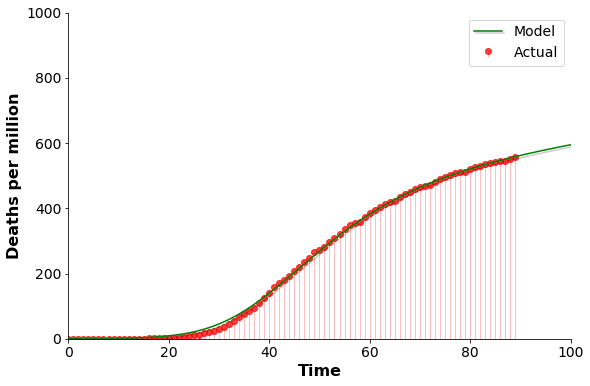

In [49]:
###
#  Curve visualization for dead
###

import matplotlib.patheffects as path_effects

plt.figure(2,figsize=(9,6))

(markers, stemlines, baseline) = plt.stem(t, data_death,bottom=-42,label='Actual',basefmt=" ")
plt.setp(stemlines, linestyle="-", color="red", linewidth=0.5,alpha=0.5 )
plt.setp(markers, color="red",alpha=0.75 )


SolutionLabel = r'Dead Per million'

plt.plot(t2,final_model_plot[5],'g-',label='Model',path_effects=[path_effects.SimpleLineShadow(alpha=0.2,rho=0.2),
                       path_effects.Normal()])

    
plt.xlabel('Time',fontsize=16,fontweight='bold')
plt.ylabel('Deaths per million',fontsize=16,fontweight='bold')
plt.legend(loc=0,fontsize=14)

plt.ylim(0,1000)
plt.xlim(0,100)


ax=plt.gca()
PlotStyle(ax,'')

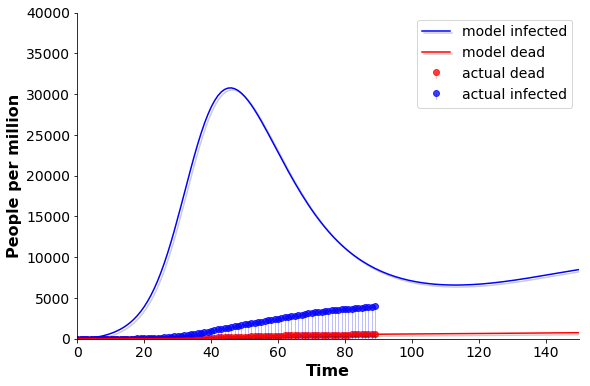

In [63]:
###
#  Curve visualization for dead
###

import matplotlib.patheffects as path_effects

plt.figure(2,figsize=(9,6))

(markers, stemlines, baseline) = plt.stem(t, data_death,bottom=-42,label='actual dead',basefmt=" ")
plt.setp(stemlines, linestyle="-", color="red", linewidth=0.5,alpha=0.5 )
plt.setp(markers, color="red",alpha=0.75 )

(markers, stemlines, baseline) = plt.stem(t, data_infection,bottom=-42,label='actual infected',basefmt=" ")
plt.setp(stemlines, linestyle="-", color="blue", linewidth=0.5,alpha=0.5 )
plt.setp(markers, color="blue",alpha=0.75 )


plt.plot(t2,final_model_plot[4],'b-',label='model infected',
         path_effects=[path_effects.SimpleLineShadow(alpha=0.2,rho=0.2),
                       path_effects.Normal()])

# S1,S2,E1,E2,I,D,R = ret.T

plt.plot(t2,final_model_plot[5],'r-',label='model dead',
         path_effects=[path_effects.SimpleLineShadow(alpha=0.2,rho=0.2),
                       path_effects.Normal()])
    
plt.xlabel('Time',fontsize=16,fontweight='bold')
plt.ylabel('People per million',fontsize=16,fontweight='bold')
plt.legend(loc=0,fontsize=14)

plt.ylim(0,40000)
plt.xlim(0,150)


ax=plt.gca()
PlotStyle(ax,'')